In [47]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
  


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

for e in june_temps:
    print(e)

('2010-06-01', 78.0)
('2010-06-02', 76.0)
('2010-06-03', 78.0)
('2010-06-04', 76.0)
('2010-06-05', 77.0)
('2010-06-06', 78.0)
('2010-06-07', 77.0)
('2010-06-08', 78.0)
('2010-06-09', 78.0)
('2010-06-10', 79.0)
('2010-06-11', 78.0)
('2010-06-12', 78.0)
('2010-06-13', 78.0)
('2010-06-14', 77.0)
('2010-06-15', 78.0)
('2010-06-16', 78.0)
('2010-06-17', 77.0)
('2010-06-18', 77.0)
('2010-06-19', 82.0)
('2010-06-20', 78.0)
('2010-06-21', 78.0)
('2010-06-22', 78.0)
('2010-06-23', 78.0)
('2010-06-24', 78.0)
('2010-06-25', 77.0)
('2010-06-26', 76.0)
('2010-06-27', 78.0)
('2010-06-28', 78.0)
('2010-06-29', 78.0)
('2010-06-30', 78.0)
('2011-06-01', 77.0)
('2011-06-02', 78.0)
('2011-06-03', 73.0)
('2011-06-04', 70.0)
('2011-06-05', 76.0)
('2011-06-06', 77.0)
('2011-06-07', 77.0)
('2011-06-08', 77.0)
('2011-06-09', 77.0)
('2011-06-10', 78.0)
('2011-06-11', 77.0)
('2011-06-12', 77.0)
('2011-06-13', 78.0)
('2011-06-14', 78.0)
('2011-06-15', 77.0)
('2011-06-17', 78.0)
('2011-06-18', 78.0)
('2011-06-19'

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns = ['date', 'temperature'])
june_temps_df.set_index(june_temps_df['date'],inplace=True)
print(june_temps_df)

                  date  temperature
date                               
2010-06-01  2010-06-01         78.0
2010-06-02  2010-06-02         76.0
2010-06-03  2010-06-03         78.0
2010-06-04  2010-06-04         76.0
2010-06-05  2010-06-05         77.0
...                ...          ...
2017-06-26  2017-06-26         79.0
2017-06-27  2017-06-27         74.0
2017-06-28  2017-06-28         74.0
2017-06-29  2017-06-29         76.0
2017-06-30  2017-06-30         75.0

[1700 rows x 2 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()


[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [9]:
# 7. Convert the December temperatures to a list.
december_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

print(december_temps)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [19]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df = pd.DataFrame(december_temps, columns = ['date', 'temperature'])
december_temps_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(23.875, 0.5, 'Frequency')

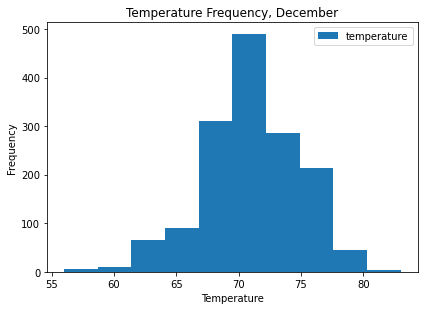

In [30]:
december_temps_df.plot.hist(bins=10)
plt.tight_layout()
plt.title('Temperature Frequency, December')
plt.xlabel("Temperature")
plt.ylabel("Frequency")

Text(23.875, 0.5, 'Frequency')

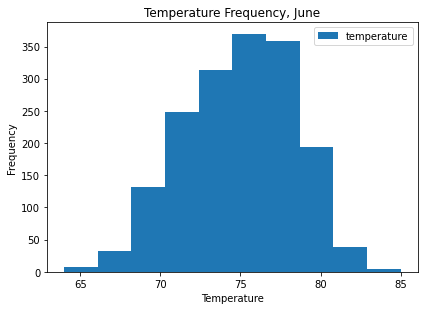

In [32]:
june_temps_df.plot.hist(bins=10)
plt.tight_layout()
plt.title('Temperature Frequency, June')
plt.xlabel("Temperature")
plt.ylabel("Frequency")

In [97]:
december_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
june_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()


In [98]:
december_precip_df = pd.DataFrame(december_precip, columns = ['date', 'precipitation'])
december_precip_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1517 non-null   object 
 1   precipitation  1405 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.8+ KB


In [90]:
june_precip_df = pd.DataFrame(june_precip, columns = ['date', 'precipitation'])

june_precip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1700 non-null   object 
 1   precipitation  1574 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.7+ KB


<AxesSubplot:xlabel='date'>

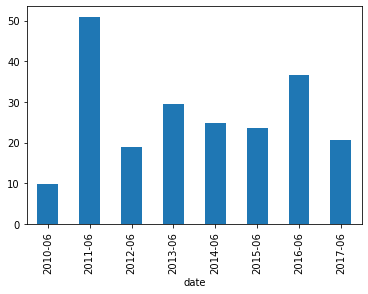

In [91]:
june_precip_df['date']= pd.to_datetime(june_precip_df['date'])
june_precip_df['precipitation'].groupby(june_precip_df['date'].dt.to_period('M')).sum().plot(kind='bar')




<AxesSubplot:xlabel='date'>

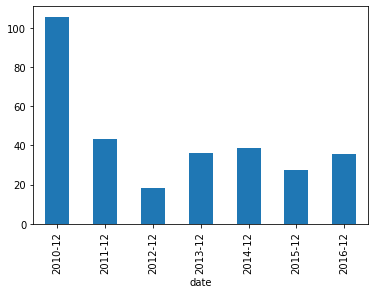

In [93]:
december_precip_df['date']= pd.to_datetime(december_precip_df['date'])
december_precip_df['precipitation'].groupby(december_precip_df['date'].dt.to_period('M')).sum().plot(kind='bar')




In [95]:
december_yearly_precip_df = december_precip_df['precipitation'].groupby(december_precip_df['date'].dt.to_period('M')).sum()
december_yearly_precip_df.describe()





count      7.000000
mean      43.518571
std       28.581579
min       18.100000
25%       31.485000
50%       36.000000
75%       40.985000
max      105.590000
Name: precipitation, dtype: float64

In [96]:
june_yearly_precip_df = june_precip_df['precipitation'].groupby(june_precip_df['date'].dt.to_period('M')).sum()
june_yearly_precip_df.describe()




count     8.000000
mean     26.828750
std      12.503501
min       9.800000
25%      20.097500
50%      24.140000
75%      31.352500
max      50.910000
Name: precipitation, dtype: float64